In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

In [2]:
seoul = pd.read_excel('../data/data_total_2019.xlsx')
seoul.head()

,기간,자치구,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
0,2019,강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
1,2019,강동구,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40
2,2019,강북구,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11
3,2019,강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
4,2019,관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [3]:
seoul.columns

Index(['기간', '자치구', '인구 수(명)', '면적', '범죄발생건수', '경찰관서 수', '소방관서 수', '카페 수',
       '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수', '반려동물 가구 비율(%, 인구 수)',
       '행복지수 종합'],
      dtype='object')

In [4]:
seoul_area = seoul.copy()
var_list = ['인구 수(명)', '범죄발생건수', '경찰관서 수', '소방관서 수', '카페 수',
       '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수']
seoul_area = seoul_area[var_list].div(seoul_area['면적'], 1)

In [9]:
seoul.sort_values(by = '인구 수(명)', ascending = False).head(5)

,기간,자치구,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
17,2019,송파구,682741,33.87,5698,21,7,1914,550,169,430,13520,547,19.4,6.94
3,2019,강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
0,2019,강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
8,2019,노원구,537303,35.44,4153,18,6,971,342,181,546,9510,336,21.4,7.22
4,2019,관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [10]:
seoul.set_index('자치구', inplace = True)
seoul.head()

,기간,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
자치구,,,,,,,,,,,,,,
강남구,2019,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
강동구,2019,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40
강북구,2019,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11
강서구,2019,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
관악구,2019,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [12]:
seoul.drop('기간', axis = 1, inplace = True)

In [14]:
seoul.head()

,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
자치구,,,,,,,,,,,,,
강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
강동구,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40
강북구,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11
강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [26]:
print('인구수\n', np.corrcoef(seoul['인구 수(명)'], seoul['범죄발생건수']))
print('면적\n', np.corrcoef(seoul['면적'], seoul['범죄발생건수']))
print('경찰관서 수\n', np.corrcoef(seoul['경찰관서 수'], seoul['범죄발생건수']))
print('소방관서 수\n', np.corrcoef(seoul['소방관서 수'], seoul['범죄발생건수']))
print('카페 수\n', np.corrcoef(seoul['카페 수'], seoul['범죄발생건수']))
print('편의점 수\n', np.corrcoef(seoul['편의점 수'], seoul['범죄발생건수']))
print('공원 수\n', np.corrcoef(seoul['공원 수'], seoul['범죄발생건수']))
print('버스정류장 수\n', np.corrcoef(seoul['버스정류장 수'], seoul['범죄발생건수']))
print('가로등 수\n', np.corrcoef(seoul['가로등 수'], seoul['범죄발생건수']))
print('ATM 수\n', np.corrcoef(seoul['ATM 수'], seoul['범죄발생건수']))
print('반려동물 가구 비율(%, 인구 수)\n', np.corrcoef(seoul['반려동물 가구 비율(%, 인구 수)'], seoul['범죄발생건수']))
print('행복지수 종합\n', np.corrcoef(seoul['행복지수 종합'], seoul['범죄발생건수']))

인구수
 [[1.         0.50518958]
 [0.50518958 1.        ]]
면적
 [[1.         0.62978128]
 [0.62978128 1.        ]]
경찰관서 수
 [[1.         0.34573044]
 [0.34573044 1.        ]]
소방관서 수
 [[1.         0.54299676]
 [0.54299676 1.        ]]
카페 수
 [[1.         0.69409927]
 [0.69409927 1.        ]]
편의점 수
 [[1.        0.8812223]
 [0.8812223 1.       ]]
공원 수
 [[1.         0.52208546]
 [0.52208546 1.        ]]
버스정류장 수
 [[1.         0.38733366]
 [0.38733366 1.        ]]
가로등 수
 [[1.         0.72841828]
 [0.72841828 1.        ]]
ATM 수
 [[1.         0.86892816]
 [0.86892816 1.        ]]
반려동물 가구 비율(%, 인구 수)
 [[1.         0.39952423]
 [0.39952423 1.        ]]
행복지수 종합
 [[1.         0.15003105]
 [0.15003105 1.        ]]


In [27]:
plt.rc('font', family = 'Malgun Gothic')  # 글씨체 불러오기
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨지는거 방지

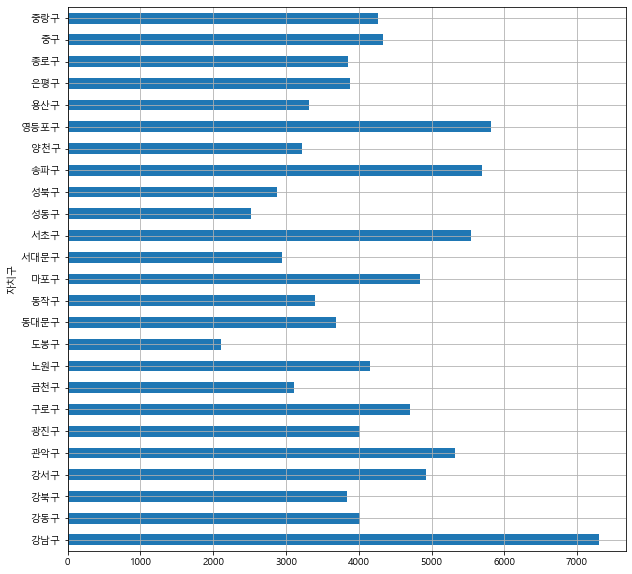

In [28]:
plt.figure(figsize = (10, 10))
seoul['범죄발생건수'].plot(kind = 'barh', grid = True)
plt.show()

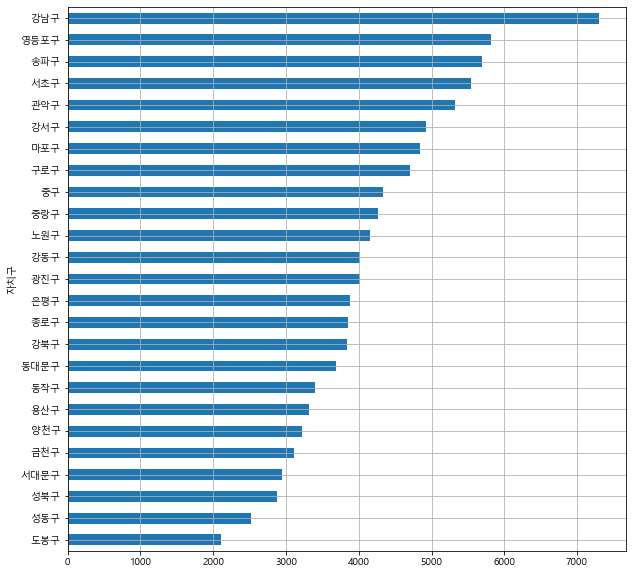

In [29]:
plt.figure(figsize = (10, 10))
seoul['범죄발생건수'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

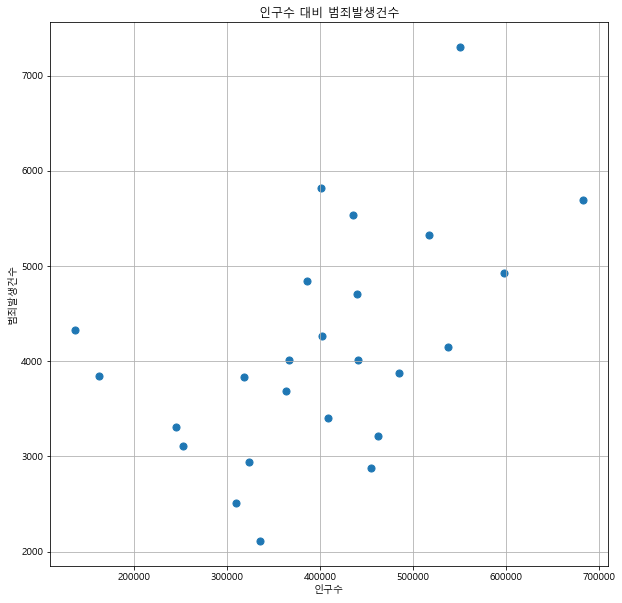

In [32]:
plt.figure(figsize = (10, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], s = 50)
plt.title('인구수 대비 범죄발생건수')
plt.xlabel('인구수')
plt.ylabel('범죄발생건수')
plt.grid()
plt.show()

In [33]:
fp1 = np.polyfit(seoul['인구 수(명)'], seoul['범죄발생건수'], 1)
fp1

array([4.66932842e-03, 2.27693730e+03])

In [34]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

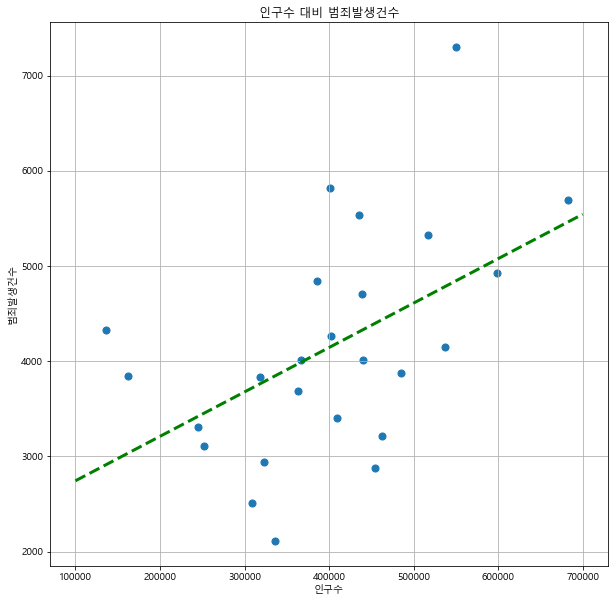

In [35]:
plt.figure(figsize = (10, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')
plt.title('인구수 대비 범죄발생건수')
plt.xlabel('인구수')
plt.ylabel('범죄발생건수')
plt.grid()
plt.show()

In [36]:
fp1 = np.polyfit(seoul['인구 수(명)'], seoul['범죄발생건수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

seoul['오차'] = np.abs(seoul['범죄발생건수'] - f1(seoul['인구 수(명)']))

df_sort = seoul.sort_values(by = '오차', ascending =False)
df_sort.head()

,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합,오차
자치구,,,,,,,,,,,,,,
강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01,2457.956177
도봉구,335631,20.65,2110,10,5,504,237,79,392,4556,228,19.2,6.89,1734.108670
영등포구,400986,24.55,5820,16,6,1489,468,108,507,9278,460,24.9,6.68,1670.727372
성북구,454744,24.58,2877,26,5,1057,334,133,602,5584,340,22.0,6.95,1523.286386
중구,136488,9.96,4327,20,7,1499,346,73,211,8665,413,17.4,6.48,1412.755400


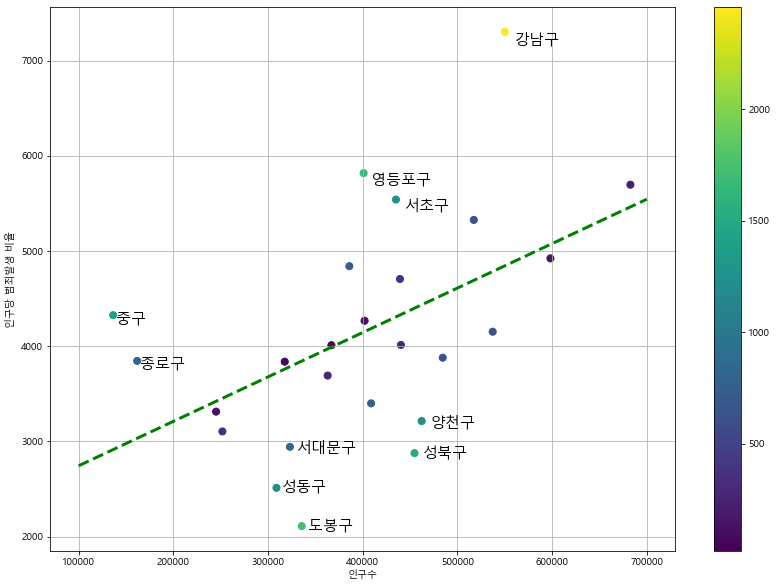

In [37]:
plt.figure(figsize = (14, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], c = seoul['오차'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구 수(명)'][n] * 1.02, df_sort['범죄발생건수'][n] * 0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당 범죄발생 비율')

plt.colorbar()
plt.grid()
plt.show()